In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stops = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
%matplotlib inline

In [2]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Import dataframe

In [5]:
df=pd.read_csv('LibCon03-06-2018.csv')

df.shape

(3842, 18)

Seperate the Liberal dataset

In [6]:
df=df[df['subreddit']=='Liberal'] 


In [7]:
df.shape

(1658, 18)

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


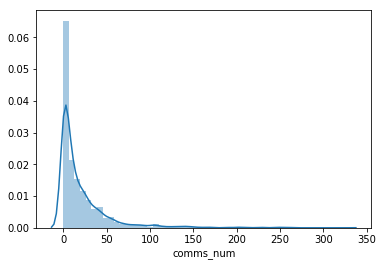

In [10]:
sns.distplot(df['comms_num']);


/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


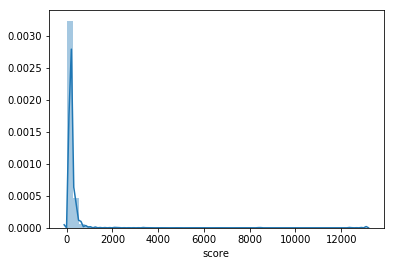

In [9]:
sns.distplot(df['score']);

In [36]:
print('Scores')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.score),np.median(df.score)))
print('Number of coments')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.comms_num),np.median(df.comms_num)))



Scores
Mean is 170.42 and the Median is 143.00
Number of coments
Mean is 21.37 and the Median is 9.00


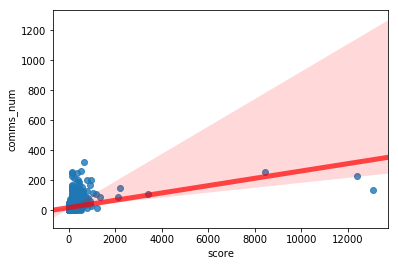

In [11]:
#Examine the relationship between score and number of comments 
sns.regplot(x=df['score'], y=df["comms_num"], 
            line_kws={"color":"r","alpha":0.7,"lw":5});

There is low correlation between the variables

In [13]:
df['score'].corr(df['comms_num'])

0.37989281697299787

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 66 to 2841
Data columns (total 18 columns):
body                77 non-null object
comms_num           1658 non-null int64
created             1658 non-null float64
domain              1658 non-null object
id                  1658 non-null object
score               1658 non-null int64
subreddit           1658 non-null object
time_retrieved      1658 non-null object
title               1658 non-null object
time                1658 non-null object
time_retrieved.1    1658 non-null object
post_duration       1658 non-null float64
time_hm             1658 non-null int64
day                 1658 non-null object
word_count          1658 non-null int64
sent_sia            1658 non-null float64
sentiment           1658 non-null float64
subjectivity        1658 non-null float64
dtypes: float64(5), int64(4), object(9)
memory usage: 246.1+ KB


In [19]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop(["score","comms_num"])
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df_num = df[numerical_features]
df_cat = df[categorical_features]

Numerical features : 7
Categorical features : 9


In [27]:
df.head(2)

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,time_retrieved.1,post_duration,time_hm,day,word_count,sent_sia,sentiment,subjectivity
66,NaN,7,21.044358,thinkprogress.org,1ly4hq,131,Liberal,2018-05-30 22:07:10.938189+00:00,Watchdog Finds Zero Major Overpayments In Food...,2013-09-08 09:40:15.000000,2018-05-30 22:07:10.938189,12.0,9,Sun,2.944439,-0.75,0.06,0.405465
67,NaN,0,21.147069,theatlantic.com,8ne6uc,0,Liberal,2018-05-31 13:51:33.816391+00:00,The Man Who Would Be Speaker,2018-05-31 09:55:44.000000,2018-05-31 13:51:33.816391,4.0,9,Sun,1.945910,0.00,0.00,0.000000


Assign sentiment labels for visualization

In [28]:
df['sent_label'] = 'neutral'
df.loc[df['sentiment'] > 0.1, 'sent_label'] = 'positive'
df.loc[df['sentiment'] < -0.1, 'sent_label'] = 'negative'
df.head(3)
    

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,time_retrieved.1,post_duration,time_hm,day,word_count,sent_sia,sentiment,subjectivity,sent_label
66,NaN,7,21.044358,thinkprogress.org,1ly4hq,131,Liberal,2018-05-30 22:07:10.938189+00:00,Watchdog Finds Zero Major Overpayments In Food...,2013-09-08 09:40:15.000000,2018-05-30 22:07:10.938189,12.0,9,Sun,2.944439,-0.75,0.06,0.405465,neutral
67,NaN,0,21.147069,theatlantic.com,8ne6uc,0,Liberal,2018-05-31 13:51:33.816391+00:00,The Man Who Would Be Speaker,2018-05-31 09:55:44.000000,2018-05-31 13:51:33.816391,4.0,9,Sun,1.945910,0.00,0.00,0.000000,neutral
68,NaN,0,21.147051,theweek.com,8naxnt,0,Liberal,2018-05-31 13:51:33.816391+00:00,The resegregation of America,2018-05-31 02:25:14.000000,2018-05-31 13:51:33.816391,11.0,2,Sun,1.609438,-0.48,0.00,0.000000,neutral


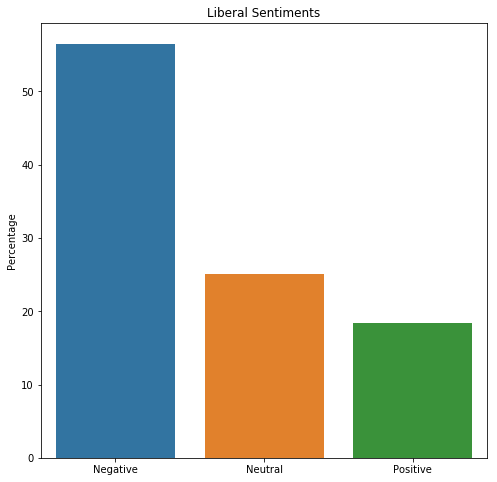

In [113]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.sent_label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
ax.set_title("Liberal Sentiments")
plt.show()

Distribution of post duration

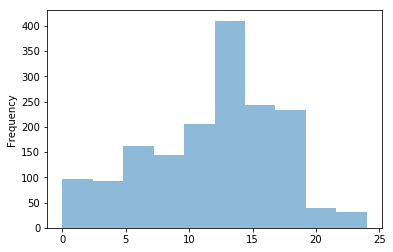

In [32]:
df['post_duration'].plot(kind='hist', alpha=.5);

Distribution of domains

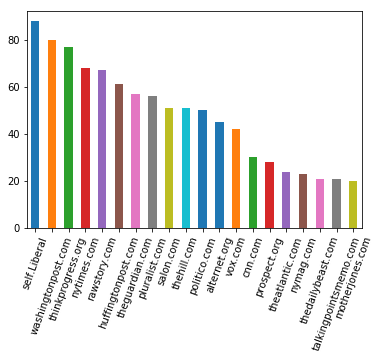

In [34]:
df['domain'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=70);

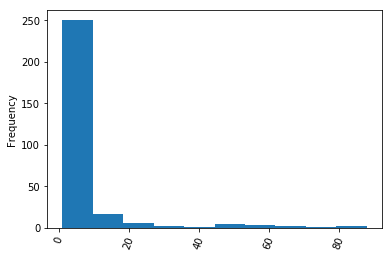

In [35]:
df['domain'].value_counts().plot(kind='hist')
plt.xticks(rotation=70);

Majority of the domain post come from around 30 websites 

In [1]:
#Selecting the top 30 websites
DD= df['domain'].value_counts().head(30).index.tolist() 

df['domain_d'] = [type_ if type_ in DD
                      else "OTHER" for type_ in df['domain']]
df['domain_d'].value_counts()

NameError: name 'df' is not defined

In [39]:
df['word_count'] = df['word_count'].round(2)

Distribution of word lengths

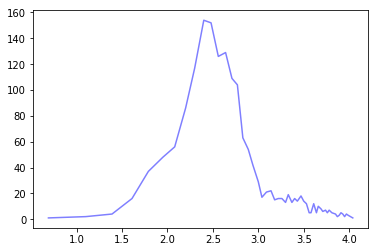

In [40]:
df['word_count'].value_counts().sort_index().plot(color='b', alpha=.5);

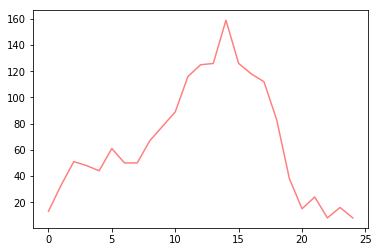

In [41]:
df['post_duration'].value_counts().sort_index().plot(color='r', alpha=.5);

In [68]:
le=LabelEncoder()
X = df[['word_count','sentiment','subjectivity','domain','post_duration']]
X_n=df[['word_count','sentiment','subjectivity','domain','title','post_duration']]
# y=df_combined['subreddit']
# transform the label 
y = le.fit_transform(df['subreddit'])

## Feature Engineering

In [58]:
print('Scores')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.score),np.median(df.score)))
print('Number of coments')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.comms_num),np.median(df.comms_num)))



Scores
Mean is 170.42 and the Median is 143.00
Number of coments
Mean is 21.37 and the Median is 9.00


In [59]:
df['com_label'] = np.where(df['comms_num']>=np.median(df.comms_num), 'High', 'Low')
df['score_label'] = np.where(df['score']>=np.median(df.score), 'High', 'Low')

In [61]:
#non_nlp variables 
X = df[['word_count','sentiment','subjectivity','domain_d','post_duration']]
# y=df_combined['subreddit']
# transform the label 



y_cm = LabelEncoder().fit_transform(df['com_label'])#Comments
y_sc = LabelEncoder().fit_transform(df['score_label'])# Score


In [62]:

df.corr()

,word_count,sentiment,subjectivity,post_duration
word_count,1.000000,0.030057,0.280300,0.051216
sentiment,0.030057,1.000000,-0.035218,-0.040948
subjectivity,0.280300,-0.035218,1.000000,0.014853
post_duration,0.051216,-0.040948,0.014853,1.000000


In [63]:
def corr_map(df, figsize=(20,10), mask_val = None):
    # Make correlation heat map from pandas dataframe
    # pass a value to mask_val to only see correlations
    # above a certain value (the absolute value of the correlation)

    # Arguments:
    # df - pandas dataframe to with data for heatmap
    # figsize - size of resulting figure (width, height), default: (15, 10) (inches?)
    # mask_val - threshold for displaying correlations, default: None

    corr = df.corr()    
    
    # Make mask to only show bottom triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(corr)] = True
    
    # Add to the mask (if mask_val passed)
    if (mask_val != None):
        mask[abs(corr) < mask_val] = True
    
    # Make heatmap
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr, mask=mask, annot=True, fmt='.2g')
    pass

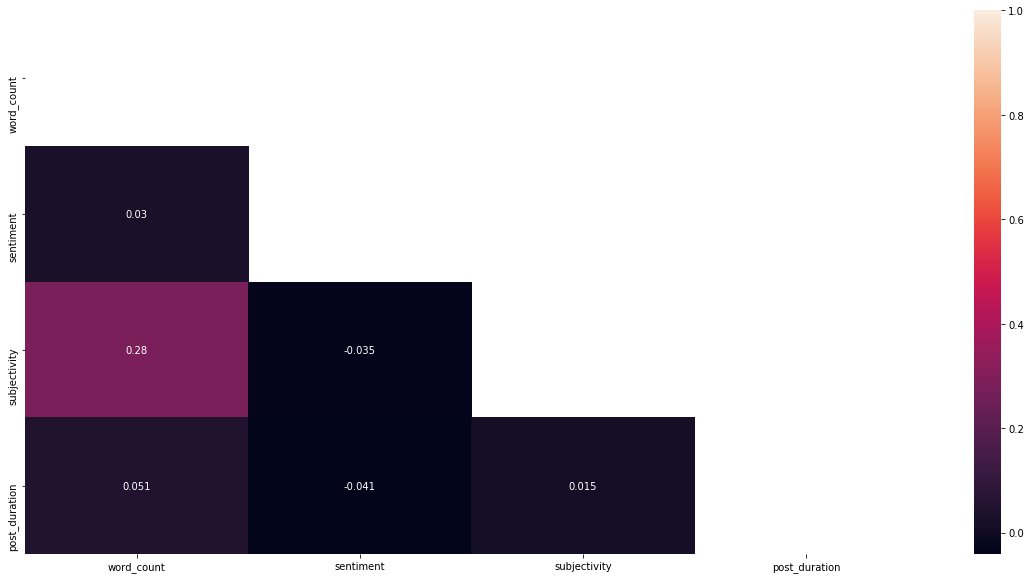

In [64]:
corr_map(X)

Correlation between word count and subjectivity .. verbose people are more objective?

In [66]:
df['domain_d'].nunique()

31

In [69]:
#286 domains .. need to condense
DD= df['domain'].value_counts().head(30).index.tolist()


df['domain_d'] = [type_ if type_ in DD
                      else "OTHER" for type_ in X['domain']]
print(df['domain_d'].nunique())

31


/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


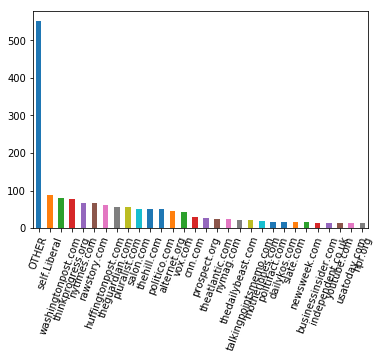

In [57]:
df['domain_d'].value_counts().head(30).plot(kind='bar')
plt.xticks(rotation=70);

***Text Preprossesing**

In [71]:
df['text']=df['title'].str.replace('\d+', '')
# df_lib_con.title = df_lib_con.title.str.replace('\d+', '')

def process_lem(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    
    lemmer = WordNetLemmatizer()
    stop_words = stopwords.words("english")
    return ' '.join([lemmer.lemmatize(word) for word in tokens if not word in stop_words])

df['text'] = [process_lem(text) for text in df['text']]




In [72]:
df.head(5)

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,...,day,word_count,sent_sia,sentiment,subjectivity,sent_label,domain_d,com_label,score_label,text
66,NaN,7,21.044358,thinkprogress.org,1ly4hq,131,Liberal,2018-05-30 22:07:10.938189+00:00,Watchdog Finds Zero Major Overpayments In Food...,2013-09-08 09:40:15.000000,...,Sun,2.94,-0.75,0.06,0.405465,neutral,thinkprogress.org,Low,Low,watchdog find zero major overpayment food stam...
67,NaN,0,21.147069,theatlantic.com,8ne6uc,0,Liberal,2018-05-31 13:51:33.816391+00:00,The Man Who Would Be Speaker,2018-05-31 09:55:44.000000,...,Sun,1.95,0.00,0.00,0.000000,neutral,theatlantic.com,Low,Low,man would speaker
68,NaN,0,21.147051,theweek.com,8naxnt,0,Liberal,2018-05-31 13:51:33.816391+00:00,The resegregation of America,2018-05-31 02:25:14.000000,...,Sun,1.61,-0.48,0.00,0.000000,neutral,OTHER,Low,Low,resegregation america
69,its okay to be white,6,21.147039,self.Liberal,8n8g8u,0,Liberal,2018-05-31 13:51:33.816391+00:00,its okay to be white,2018-05-30 21:11:04.000000,...,Sun,1.79,0.76,0.25,0.223144,positive,self.Liberal,Low,Low,okay white
70,I'm not sure if this is the right place to pos...,3,21.147042,self.Liberal,8n91b6,0,Liberal,2018-05-31 13:51:33.816391+00:00,Disappointed in lack of diversity at Universal...,2018-05-30 22:31:02.000000,...,Sun,2.20,-0.32,-0.38,0.322083,negative,self.Liberal,Low,Low,disappointed lack diversity universal studio


In [77]:
#non_nlp variables 

X = df[['word_count','sentiment','subjectivity','domain_d','post_duration','title','text']]
# y=df_combined['subreddit']
# transform the label 

le=LabelEncoder()

y_cm = le.fit_transform(df['com_label'])#Comments
y_sc = le.fit_transform(df['score_label'])# Score


In [78]:
X_d = pd.get_dummies(X, columns=['domain_d'], drop_first=True)

In [85]:
X_d.head(2)

,word_count,sentiment,subjectivity,post_duration,title,text,domain_d_alternet.org,domain_d_businessinsider.com,domain_d_cnn.com,domain_d_dailykos.com,...,domain_d_talkingpointsmemo.com,domain_d_theatlantic.com,domain_d_thedailybeast.com,domain_d_theguardian.com,domain_d_thehill.com,domain_d_thinkprogress.org,domain_d_usatoday.com,domain_d_vox.com,domain_d_washingtonpost.com,domain_d_youtube.com
66,2.94,0.06,0.405465,12.0,Watchdog Finds Zero Major Overpayments In Food...,watchdog find zero major overpayment food stam...,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
67,1.95,0.00,0.000000,4.0,The Man Who Would Be Speaker,man would speaker,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


(1658, 36)

In [80]:
y_cm.shape

(1658,)

Non-NLP **Comments**

In [86]:
X_c=X_d.drop(['title','text'],axis=1)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_c, y_cm, test_size=0.5, random_state=42)

In [88]:
forest = RandomForestClassifier(max_depth=10, n_estimators=5)
lr=LogisticRegression()

In [89]:
lr.fit(X_train, y_train)
print('Log Reg')
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

forest.fit(X_train, y_train)
print('\n Random Forest')
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

Log Reg
0.6151990349819059
0.5741857659831122

 Random Forest
0.7189384800965019
0.5814234016887817


In [90]:
from tpot import TPOTClassifier

tpot=TPOTClassifier()

tpot = TPOTClassifier(generations=3, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline.py')

Optimization Progress:  50%|█████     | 40/80 [00:26<00:26,  1.53pipeline/s]

Generation 1 - Current best internal CV score: 0.5886235852500914


Optimization Progress:  75%|███████▌  | 60/80 [00:40<00:14,  1.39pipeline/s]

Generation 2 - Current best internal CV score: 0.5922964585615188


Generation 3 - Current best internal CV score: 0.5922964585615188

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.4, min_samples_leaf=14, min_samples_split=8, n_estimators=100)
0.5609167671893848


True

Non-NLP **Score**

In [91]:
X_s=X_d.drop(['title','text'],axis=1)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_sc, test_size=0.5, random_state=42)

In [93]:
forest = RandomForestClassifier(max_depth=10, n_estimators=5)
lr=LogisticRegression()

In [94]:
lr.fit(X_train, y_train)
print('Log Reg')
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

forest.fit(X_train, y_train)
print('\n Random Forest')
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

Log Reg
0.6513872135102533
0.6007237635705669

 Random Forest
0.7334137515078407
0.5729794933655006


In [95]:
from tpot import TPOTClassifier

tpot=TPOTClassifier()

tpot = TPOTClassifier(generations=3, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline.py')

Optimization Progress:  50%|█████     | 40/80 [00:15<00:18,  2.14pipeline/s]

Generation 1 - Current best internal CV score: 0.5850190528034839


Optimization Progress:  75%|███████▌  | 60/80 [00:25<00:12,  1.60pipeline/s]

Generation 2 - Current best internal CV score: 0.5850190528034839


Generation 3 - Current best internal CV score: 0.5863327889675195

Best pipeline: BernoulliNB(LogisticRegression(RBFSampler(RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.15000000000000002, min_samples_leaf=20, min_samples_split=3, n_estimators=100), gamma=0.55), C=10.0, dual=False, penalty=l2), alpha=1.0, fit_prior=True)
0.5838359469240049


True

**NLP-score**


In [96]:
X_s_n=X_d

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_s_n, y_sc, test_size=0.5, random_state=42)

In [98]:
tvec = TfidfVectorizer(stop_words=stopwords.words('english'),
                                 lowercase=True,max_features=500)

X_train_matrix = tvec.fit_transform(X_train['text'])
X_test_matrix = tvec.transform(X_test['text'])

In [93]:
forest = RandomForestClassifier(max_depth=10, n_estimators=5)
lr=LogisticRegression()

In [99]:
X_train_df = pd.DataFrame(X_train_matrix.todense(),
                         columns=tvec.get_feature_names(),
                         index=X_train.index)

In [100]:
X_test_df = pd.DataFrame(X_test_matrix.todense(),
                        columns=tvec.get_feature_names(),
                        index=X_test.index)

In [101]:
X_train_all = pd.concat([X_train_df, X_train.drop('title', axis=1)], axis=1)
X_test_all = pd.concat([X_test_df, X_test.drop('title', axis=1)], axis=1)

In [102]:
forest = RandomForestClassifier(max_depth=10, n_estimators=5)
lr=LogisticRegression()

In [103]:
lr.fit(X_train_matrix, y_train)
print('Log Reg')
print(lr.score(X_train_matrix, y_train))
print(lr.score(X_test_matrix, y_test))

forest.fit(X_train_matrix, y_train)
print('\n Random Forest')
print(forest.score(X_train_matrix, y_train))
print(forest.score(X_test_matrix, y_test))

Log Reg
0.8190591073582629
0.5741857659831122

 Random Forest
0.6224366706875754
0.49939686369119424


Worse by itself .. lets see if it'll improve

**NLP-comments**


In [111]:
X_cm_n=X_d

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_s_n, y_sc, test_size=0.5, random_state=42)

In [98]:
tvec = TfidfVectorizer(stop_words=stopwords.words('english'),
                                 lowercase=True,max_features=500)

X_train_matrix = tvec.fit_transform(X_train['text'])
X_test_matrix = tvec.transform(X_test['text'])

In [93]:
forest = RandomForestClassifier(max_depth=10, n_estimators=5)
lr=LogisticRegression()

In [99]:
X_train_df = pd.DataFrame(X_train_matrix.todense(),
                         columns=tvec.get_feature_names(),
                         index=X_train.index)

In [100]:
X_test_df = pd.DataFrame(X_test_matrix.todense(),
                        columns=tvec.get_feature_names(),
                        index=X_test.index)

In [101]:
X_train_all = pd.concat([X_train_df, X_train.drop('title', axis=1)], axis=1)
X_test_all = pd.concat([X_test_df, X_test.drop('title', axis=1)], axis=1)

In [102]:
forest = RandomForestClassifier(max_depth=10, n_estimators=5)
lr=LogisticRegression()

In [103]:
lr.fit(X_train_matrix, y_train)
print('Log Reg')
print(lr.score(X_train_matrix, y_train))
print(lr.score(X_test_matrix, y_test))

forest.fit(X_train_matrix, y_train)
print('\n Random Forest')
print(forest.score(X_train_matrix, y_train))
print(forest.score(X_test_matrix, y_test))

Log Reg
0.8190591073582629
0.5741857659831122

 Random Forest
0.6224366706875754
0.49939686369119424


Worse by itself .. lets see if it'll improve

In [104]:
X_train_all.shape

(829, 535)

In [105]:
X_test_all.shape

(829, 535)

In [106]:
print((X_train_all.select_dtypes(include=['O']).columns.values))

['text']


In [107]:
X_train_all=X_train_all.drop('text',axis=1)
X_test_all=X_test_all.drop('text',axis=1)

In [108]:
lr.fit(X_train_all, y_train)
print('Log Reg')
print(lr.score(X_train_all, y_train))
print(lr.score(X_test_all, y_test))

forest.fit(X_train_all, y_train)
print('\n Random Forest')
print(forest.score(X_train_all, y_train))
print(forest.score(X_test_all, y_test))

Log Reg
0.8166465621230398
0.6248492159227985

 Random Forest
0.6815440289505428
0.5572979493365501


In [ ]:
df.

In [110]:
from tpot import TPOTClassifier

tpot=TPOTClassifier()

tpot = TPOTClassifier(generations=3, population_size=20, verbosity=2)
tpot.fit(X_train_all, y_train)
print(tpot.score(X_test_all, y_test))
tpot.export('tpot_pipeline.py')

Optimization Progress:  51%|█████▏    | 41/80 [06:47<03:28,  5.34s/pipeline]  

Generation 1 - Current best internal CV score: 0.5874723280711305


Optimization Progress:  76%|███████▋  | 61/80 [09:06<01:06,  3.49s/pipeline]

Generation 2 - Current best internal CV score: 0.5934313191798222


Generation 3 - Current best internal CV score: 0.6043694429323173

Best pipeline: BernoulliNB(OneHotEncoder(input_matrix, minimum_fraction=0.05, sparse=False), alpha=1.0, fit_prior=False)
0.6357056694813028


True

In [112]:
df.to_pickle('r_liberal.pickle')